In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
x = df[['Pclass','SibSp','Parch','Fare']]
y = df.Survived

In [8]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
x.head()

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [11]:
x_train.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [12]:
s_col = ['Fare']

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train.loc[:,s_col] = sc.fit_transform(x_train[s_col])

In [14]:
x_test.loc[:,s_col] = sc.fit_transform(x_test[s_col])

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

In [16]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNN(n_neighbors=k,metric='minkowski') 
    classifier.fit(x_train,y_train) 
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred) 
    acc_values.append(acc)

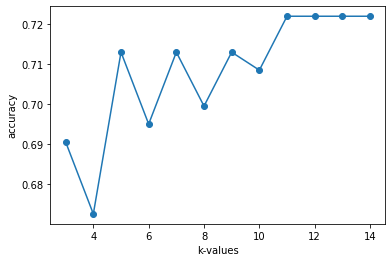

In [17]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-values')
plt.ylabel('accuracy')
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
SEED=42
lr=LogisticRegression(random_state=SEED)
knn=KNN(n_neighbors= 7)
svcl = SVC(kernel='linear')
svcp = SVC(kernel='poly')
svcr = SVC(kernel='rbf')
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
classifiers=[('LogisticRegression',lr),('K Nearest Neighbors',knn),('Linear SVM',svcl),('Polynomial SVM',svcp),
             ('Radial SVM',svcr),('Decision tree',dt),('Random Forest',rf)]

In [19]:
for class_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('{:s} : {:.2f}'.format(class_name,accuracy))

LogisticRegression : 0.71
K Nearest Neighbors : 0.71
Linear SVM : 0.69
Polynomial SVM : 0.68
Radial SVM : 0.73
Decision tree : 0.68
Random Forest : 0.69


In [20]:
model = [lr, knn, svcr, dt, rf]

In [21]:
from sklearn.model_selection import cross_val_score, KFold
for i in model:
    kf = KFold(n_splits = 5)
    score = cross_val_score(i,x,y,cv=kf)
    print ("Average cross val score for {} : {:.3f}".format(i,score.mean()))


Average cross val score for LogisticRegression(random_state=42) : 0.682
Average cross val score for KNeighborsClassifier(n_neighbors=7) : 0.651
Average cross val score for SVC() : 0.666
Average cross val score for DecisionTreeClassifier() : 0.688
Average cross val score for RandomForestClassifier() : 0.694


In [22]:
parameters ={'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}

In [23]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator= SVC(), 
    param_grid=parameters, 
    scoring='accuracy',
    cv=5,)

In [24]:
grid_result = grid_search.fit(x_train, y_train)

In [25]:
print('best params:',grid_result.best_params_)
print('best score:', grid_result.best_score_)

best params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
best score: 0.7215800695769274
